In [0]:
#@title <b><font color="red">▶</font><font color="black"> run this cell to prepare supplementary materials for the lesson</font></b>

!rm -rf harbour-space-text-mining-course
!git clone https://github.com/horoshenkih/harbour-space-text-mining-course.git
import sys
if 'harbour-space-text-mining-course' not in sys.path:
    sys.path.append('harbour-space-text-mining-course')

from tmcourse.utils import (
    plot_confusion_matrix,
    display_cv_results,
)
from tmcourse.ipyquiz import Quiz, Function
from tmcourse.utils import enable_mathjax_in_cell

from IPython.display import HTML, display

# get_ipython().events.register('pre_run_cell', enable_mathjax_in_cell)
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
!pip install allennlp

Cloning into 'harbour-space-text-mining-course'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 571 (delta 0), reused 6 (delta 0), pack-reused 563
Receiving objects: 100% (571/571), 89.64 MiB | 18.33 MiB/s, done.
Resolving deltas: 100% (324/324), done.
Checking out files: 100% (80/80), done.
     |████████████████████████████████| 7.6MB 5.2MB/s 
     |████████████████████████████████| 266kB 40.6MB/s 
     |████████████████████████████████| 51kB 4.3MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 30.9MB 100kB/s 
     |████████████████████████████████| 204kB 43.2MB/s 
     |████████████████████████████████| 163kB 39.6MB/s 
     |████████████████████████████████| 133kB 43.8MB/s 
     |████████████████████████████████| 245kB 45.8MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 5.2MB 39.2MB/s 


<!--@slideshow slide-->
<center><h1>Neural Language Models</h1></center>

<!--@slideshow slide-->
# Outline
1. Discussion session
1. Contextual word meanings
1. RNN Language Models for word embeddings
  - Stacked RNN
  - Bidirectional RNN
  - Embeddings from Language Models (ELMo)
1. RNN Language Models for classification
  - Universal Language Model Fine-tuning (ULMfit)
1. Coding session.

<!--@slideshow slide-->
# Discussion session
## How to present your project
1. Describe the real-world problem you are solving in the final project.
1. Describe the data.
1. Describe the stages of your solution.
1. Describe the problems you have encountered.
1. Tell us about the ideas you haven’t tried yet, or about the ideas that didn’t work.
1. Show the demo or share your ideas about it.

## How to discuss the presentation
1. Ask about relevant technical details.
1. If you know how to solve problems mentioned by the speaker, share your experience.
1. Suggest ideas for a mini-product.


<!--@slideshow slide-->
# Contextual word meanings

<!--@slideshow slide-->
Consider two sentences
1. These people over here **stick** together like glue!
1. His hat and **stick** lay on the table.

The word "stick" has different meanings.

<!--@slideshow fragment-->
**Problem**: we cannot learn many meanings (vectors) yet.
> word2vec, GloVe, FastText return one vector for each word.

<!--@slideshow fragment-->
**What we want**:
- Read the sequence.
- For each word, find the meaning (vector) according to the information from the sequence.

<!--@slideshow fragment-->
**What we will try**: Recurrent Neural Networks.
- RNN produces a vector (hidden state) for each input element.
- RNN can learn a language model.

<!--@slideshow slide-->
# RNN Language Models for word embeddings

<!--@slideshow slide-->
## Multilayer RNN

<!--@slideshow slide-->
So far we discussed RNNs with only one layer:
$$
h_t = \mathrm{SomeFunction}(W_{xh}x_t + W_{hh} h_{t-1})
$$

<!--@slideshow fragment-->
We know that "vanilla" neural networks benefit from adding more layers (XOR problem).

**What we want**: use many layers in recurrent neural networks.

<!--@slideshow slide-->
Recall the definition of a recurrent function:
$$
h_t = f(x_t, h_{t-1})
$$
It produces the output
$$
o_t = g(h_t)
$$

<!--@slideshow fragment-->
**Idea**: this output can be the input for another recurrent function.

$$
\hat{h}_t = \hat{f}(o_t, \hat{h}_{t-1})
$$
$$
\hat{o}_t = \hat{g}(\hat{h}_{t})
$$

**Intuition**: the first layer $(f, g)$ extracts features for the second layer $(\hat{f}, \hat{g})$.

<!--@slideshow slide-->
## Bidirectional RNN




<!--@slideshow slide-->

We can use RNNs for language modeling.

Basically, language model is trained to predict the next word.


<!--@slideshow fragment-->
Consider the sequence: "Students opened their ___".

What is the next word: **exams** or **laptops**?

<!--@slideshow fragment-->
But what if the full sentences are given?
1. "Students opened their ___ as the proctor started the clock."
1. "Students opened their ___ and started coding."

<!--@slideshow slide-->
**What we want**: allow RNN to look at the "future" elements of a sequence.

<!--@slideshow fragment-->
**Idea**: read the sequence left-to-right and right-to-left.

Two RNNs:
$$
\overrightarrow{h}_t = \overrightarrow{f}(x_t, \overrightarrow{h}_{t-1})
$$
$$
\overleftarrow{h}_t = \overleftarrow{f}(x_t, \overleftarrow{h}_{\color{red}{t+1}})
$$

The result is the concatenation of $\overrightarrow{h}_t$ and $\overleftarrow{h}_t$

<!--@slideshow slide-->

<center>RNN</center>

![](https://camo.githubusercontent.com/771db850dc4b5aa8b32b4758ae68c137ee06eec4/687474703a2f2f636f6c61682e6769746875622e696f2f706f7374732f323031352d30392d4e4e2d54797065732d46502f696d672f524e4e2d67656e6572616c2e706e67)

<center>Bidirectional RNN</center>

![](https://camo.githubusercontent.com/52b9981d135220b278fbf7967f3d52e61fdd8c3e/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f3736342f312a36516e505553765f74394259394676385f614c622d512e706e67)

In [0]:
#@slideshow slide
# Source: https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/02-intermediate/bidirectional_recurrent_neural_network/main.py
# Bidirectional recurrent neural network (many-to-one)
import torch
from torch import nn
class BiRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(BiRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size*2, num_classes)  # 2 for bidirection
    
    def forward(self, x):
        # Set initial states
        # num_layers * 2 for bidirection 
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size)
        
        # Forward propagate LSTM
        # out: tensor of shape (batch_size, seq_length, hidden_size*2)
        out, _ = self.lstm(x, (h0, c0))
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

<!--@slideshow slide-->
# Embeddings from Language Models (ELMo)

ELMo is a 3-layer bidirectional LSTM language model.

<!--@slideshow slide-->
## Colab demo: `ElmoEmbedder` in `allennlp`

In [0]:
from allennlp.commands.elmo import ElmoEmbedder
elmo = ElmoEmbedder(cuda_device=0)

In [0]:
import spacy
nlp = spacy.lang.en.English()
def tokens(s):
    return [t.text for t in nlp(s)]

tokens1 = tokens("These people over here stick together like glue!")
tokens2 = tokens("Stick with the fireman, Montag")
tokens3 = tokens("His hat and stick lay on the table.")

vectors1 = elmo.embed_sentence(tokens1)
vectors2 = elmo.embed_sentence(tokens2)
vectors3 = elmo.embed_sentence(tokens3)

print(f"Number of layers in the output: {len(vectors1)}")
print(f"Number of vectors: {len(vectors1[0])}")

from scipy.spatial.distance import cosine

# get embeddings for the word "stick" from the last layer
stick1_vector = vectors1[2][tokens1.index("stick")]
stick2_vector = vectors2[2][tokens2.index("Stick")]
stick3_vector = vectors3[2][tokens3.index("stick")]
print("v1 vs v2:", cosine(stick1_vector, stick2_vector))
print("v1 vs v3:", cosine(stick1_vector, stick3_vector))
print("v2 vs v3:", cosine(stick2_vector, stick3_vector))

Number of layers in the output: 3
Number of vectors: 9
v1 vs v2: 0.42930305004119873
v1 vs v3: 0.6455164849758148
v2 vs v3: 0.6714532673358917


<!--@slideshow slide-->
# RNN Language Models for classification

<!--@slideshow slide-->
## Universal Language Model Fine-tuning (ULMfit)
1. Train LM on big general domain corpus (use biLM)
1. Tune LM on target task data
1. Fine-tune as classifier on target task

<!--@slideshow fragment-->

We already used pre-trained language models for classification!

[link](https://colab.research.google.com/drive/1RHx_zJmLblam3y49D9tQ-6RUm7SvHTZN#scrollTo=dWfiPlfCcZUD)

<!--@slideshow slide-->
## Colab demo: ULMfit in `fast.ai`

Get the data

In [0]:
from sklearn.datasets import fetch_20newsgroups
fetch_params = dict(
    shuffle=True,
    random_state=1,
    # categories=("comp.graphics", "rec.sport.hockey"),
    remove=('headers', 'footers', 'quotes')
)
dataset = fetch_20newsgroups(subset="train", **fetch_params)
dataset_test = fetch_20newsgroups(subset="test", **fetch_params)
texts_test = dataset_test.data
y_test = dataset_test.target

from sklearn.model_selection import train_test_split

# split data into training and validation set
texts_train, texts_val, y_train, y_val = train_test_split(
    dataset.data, dataset.target,
    test_size = 0.4,
    random_state = 12
)

Train logistic regression with sklearn

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
vec.fit(texts_train)
X_train = vec.transform(texts_train)
X_test = vec.transform(texts_test)

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(alpha=.0001, max_iter=50, loss="log", random_state=0)

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("vec", vec),
    ("clf", clf),
])

from sklearn.model_selection import GridSearchCV

param_grid = {
    "vec__stop_words": [None, "english"],
    "vec__ngram_range": [(1, 1), (1, 2)],
    "clf__alpha": [1e-4, 1e-3, 1e-2],
}

pipeline_grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3)
pipeline_grid_search.fit(texts_train, y_train)

display_cv_results(pipeline_grid_search)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pipeline_grid_search.predict(texts_test)))

,mean_test_score,param_clf__alpha,param_vec__ngram_range,param_vec__stop_words
0,0.721125,0.0001,"(1, 1)",english
1,0.719358,0.0001,"(1, 2)",english
2,0.700059,0.0001,"(1, 1)",None
3,0.685769,0.0001,"(1, 2)",None
4,0.668091,0.001,"(1, 1)",english
5,0.640543,0.001,"(1, 2)",english
6,0.603418,0.001,"(1, 1)",None
7,0.563641,0.01,"(1, 1)",english
8,0.538597,0.001,"(1, 2)",None
9,0.470241,0.01,"(1, 2)",english


0.6749867233138609


Prepare data for fast.ai

In [0]:
analyzer = pipeline_grid_search.best_estimator_.named_steps["vec"].build_analyzer()

def preprocess(texts):
    return [" ".join(analyzer(t)) for t in texts]

import pandas as pd
df_train = pd.DataFrame({'label': y_train, 'text': preprocess(texts_train)})
df_val = pd.DataFrame({'label': y_val, 'text': preprocess(texts_val)})
df_test = pd.DataFrame({'label': y_test, 'text': preprocess(texts_test)})

Imports from fast.ai

In [0]:
from fastai.text import (
    AWD_LSTM,  # pretrained LM
    TextLMDataBunch,  # fine-tune LM
    language_model_learner,  # fine-tune LM
    TextClasDataBunch,  # classify based on LM
    text_classifier_learner,  # classify based on LM
)

- **TextLMDataBunch** creates a data bunch for language modelling. In this, labels are completely ignored. Instead, data is processed so that the RNN can learn what word comes next given a starting word.
- **TextClasDataBunch** sets up the data for classification. Labels play a key role here. We can also set the batch size for learning by changing the bs parameter.

In [0]:
# Language model data
data_lm = TextLMDataBunch.from_df(
    train_df=df_train,
    valid_df=df_val,
    path = ""
)
# Classifier model data
data_clas = TextClasDataBunch.from_df(
    train_df=df_train,
    valid_df=df_val,
    vocab=data_lm.train_ds.vocab,
    bs=32,
    path = ""
)

Print a batch

In [0]:
data_clas.show_batch()

text,target
xxbos 14 m0 cxt 27 m cbn c24e cx rbn hkc xxunk mbc xs r6 xxunk xj ea bn gbe r6 xxunk my _ sys ct xxunk cx_s ua y _ sc _ c _ 8c _ c _ gcx y _ x_scx c _ cx_scx c _ cx c _ cx cx oc _ c _ xxunk cx xxunk cx cx c _ mcx cx_scx c _ cx ori,2
xxbos archive faq part1 modified 1993 04 04 article following contain answers frequently asked questions faq seen comp windows posted help reduce volume newsgroup provide hard information general redistribute article article includes answers following questions loosely grouped categories questions marked indicate questions new issue significant changes content issue marked topic basic information sources definitions books articles good beginners courses various toolkits available conferences coming related public mailing lists available meet,5
xxbos archive faq part4 modified 1993 04 04 subject 80 based plotting program usually available uucp sites uunet sites marked consult archie server recent versions gnuplot xxunk postscript bunch drivers export lcs mit edu contrib xxunk tar xxunk output comp sources unix xxunk graph xxunk cs rmit oz au pub graph tar 131 170 24 42 comp sources unix xxunk xxunk drawplot 2d 3d ps scam berkeley edu src local,5
xxbos cut volume number 10 april 20 1993 health info com network medical newsletter editor david dodell xxunk north xxunk street suite 210 scottsdale arizona xxunk xxunk usa telephone 602 860 1121 fax 602 451 1165 compilation copyright 1993 david dodell rights reserved license granted xxunk electronic media fees charged long text copyright notice license attached intact xxunk portion portions health info com network newsletter distributed biweekly articles medical nature,13
xxbos 14 14 1d9 p4u bxn 0 t xxunk q6 g9v 9v q30 t 0 t 0tbxom wm4u pl xxwrep 7 1d9 2tct 9f9f0 7ey bhj gizw 1 t 6e mi4 6e pl v9fq 0q xxwrep 7 ax mq 9f9f9f pl pl 6ei 6ei4 1 t 1 t giz bj nuy xxunk 1d9 p4u 8n xxwrep 5 0 t 9v g9v g9p tq xxwrep 6 b8f b4q 4 t f0,2


The `xx___` tags represent the aspects of language in a way that the computer can understand.
- The `xxbos` tag marks the beginning of a sentence.
- The `xxmaj` tag is used to imply that the first letter of the next word is capitalized.

epoch,train_loss,valid_loss,accuracy,time



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-02
Min loss divided by 10: 2.51E-02


epoch,train_loss,valid_loss,accuracy,time
0,7.702924,6.957867,0.133118,01:46
1,6.544178,6.695809,0.143605,01:46


epoch,train_loss,valid_loss,accuracy,time
0,5.737252,6.632418,0.147593,02:01
1,5.365838,6.624506,0.150837,02:01


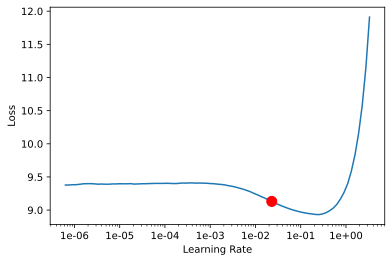

In [0]:
# train a language model
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)
# find the optimal learning rate: https://arxiv.org/abs/1506.01186
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

# use the found learning rate to train the language model
learn.fit_one_cycle(2, min_grad_lr)
# unfreezing weights and training the rest of the NN
learn.unfreeze()
learn.fit_one_cycle(2, 1e-3)

# save encoder to load from the classifier
learn.save_encoder('ft_enc')

Train the classifier

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02
Min loss divided by 10: 2.09E-02


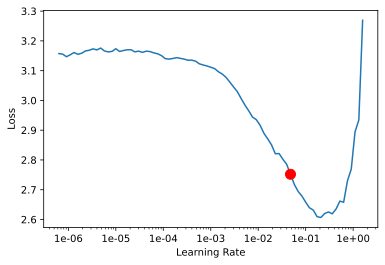

In [0]:
# create the classifier
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')
# find the optimal learning rate to start with
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

To train the classifier, we will use a technique called **gradual unfreezing**. We can start by training the last few layers, then go backwards and unfreeze and train layers before. We can use the learner function `learn.freeze_to(-2)` to unfreeze the last 2 layers.

epoch,train_loss,valid_loss,accuracy,time
0,1.711184,1.373524,0.569598,01:37
1,1.462273,1.224966,0.608263,01:54


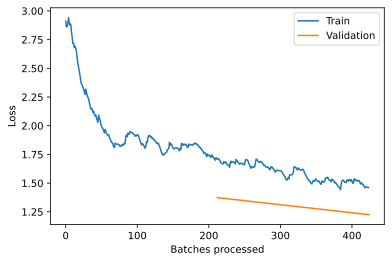

In [0]:
learn.fit_one_cycle(2, min_grad_lr)
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time
0,1.440708,1.193197,0.614671,01:59
1,1.314713,1.108974,0.644498,02:06
2,1.233008,1.054686,0.660627,02:07
3,1.080193,1.050103,0.661732,01:59


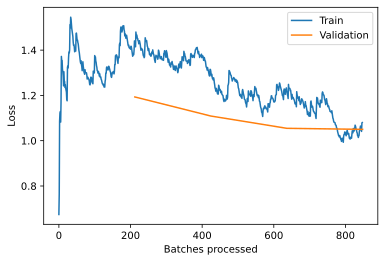

In [0]:
# unfreeze the last 2 layers
learn.freeze_to(-2)
learn.fit_one_cycle(4, slice(5e-3, 2e-3), moms=(0.8,0.7))
learn.recorder.plot_losses()

In [0]:
# unfreeze all layers and train the model at a low learning rate.
learn.unfreeze()
learn.fit_one_cycle(4, slice(2e-3/100, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.938500,1.046461,0.667698,03:07
1,1.012061,1.020017,0.673663,03:09
2,0.878298,0.990443,0.683606,02:43
3,0.850729,0.990220,0.682280,03:00


In [0]:
test_predictions = [learn.predict(t)[1].item() for t in tqdm(texts_test)]
accuracy_score(test_predictions, y_test)

<!--@slideshow slide-->
# Coding session

## Exercise 1

Implement the function `document_embedding(s, elmo)` which accepts a string `s` and return the average vector of word embeddings from the last layer of ELMo embeddings. `ElmoEmbedder` is passed as the second argument. Use spaCy tokenizer (the function `tokens` implemented above).

**NB**: for empty texts, return zero vector with 1024 elements.

In [0]:
from allennlp.commands.elmo import ElmoEmbedder
import numpy as np

elmo = ElmoEmbedder(cuda_device=0)

def document_embedding(s, elmo):
    # YOUR CODE HERE
    import spacy
    nlp = spacy.lang.en.English()

    tokens = [t.text for t in nlp(s)]
    vectors = elmo.embed_sentence(tokens)
    # print(vectors[2])
    if vectors[2].any():
      return np.mean(vectors[2], axis=0)
    else:
      return np.zero(1024)

s = "Stay humble, stack sats"
print(document_embedding(s, elmo))

[-0.25431553 -0.61591506  0.22522144 ... -0.19759229  0.08182522
  0.38227352]


## Exercise 2
Using the function `document_embedding()`, compute clusters in the testing data for 3 categories of 20newsgroup dataset (see code below).
Estimate clustering quality and plot confusion matrix.

In [0]:
# function for clustering quality estimation
def estimate_clustering_quality(target, prediction):
    from itertools import combinations
    N = len(target)
    total_pairs = 0
    # we will count the ratio of "good" pairs of points
    good_pairs = 0
    for pair in combinations(range(N), 2):
        # NB: O(n**2) complexity!
        total_pairs += 1
        i, j = pair
        if (target[i] == target[j]) == (prediction[i] == prediction[j]):
            good_pairs += 1

    return good_pairs / total_pairs

# get the data: train and test data from 20newsgroups dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
import numpy as np

categories = ("sci.space", "rec.sport.hockey", "comp.graphics")
fetch_params = dict(
    shuffle=True, random_state=1,
    remove=('headers', 'footers', 'quotes'),
    categories=categories
)
train_dataset = fetch_20newsgroups(subset="train", **fetch_params)
test_dataset = fetch_20newsgroups(subset="test", **fetch_params)


For your reference, this is how to find vectors and clusters with sklearn.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.7146142174961424

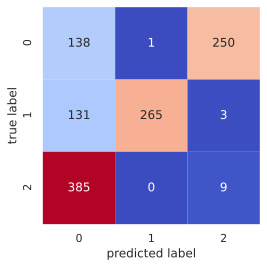

In [0]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(train_dataset.data)
X_train = vec.transform(train_dataset.data)
X_test = vec.transform(test_dataset.data)

# for this dataset we know the true number of classes
n_clusters = len(categories)

# KMeans has standard fit/predict interface
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=20)
kmeans.fit(X_train)
predictions = kmeans.predict(X_test)
plot_confusion_matrix(test_dataset.target, predictions)
estimate_clustering_quality(test_dataset.target, predictions)

**Your code** below:

In [0]:
X_elmo = document_embeddings(# YOUR CODE HERE: compute matrix of vectors on test_dataset

In [0]:
# YOUR CODE HERE:
# fit KMeans on X_elmo, predict clusters, plot confusion matrix and estimate clustering quality


## Exercise 3

In your solution of Exercise 2 from the coding session `8_rnn_2.ipynb`, use bidirectional LSTM and compare the result with the previous implementation.

<!--@slideshow slide-->
# Summary
1. RNN Language Models for contextual word embeddings
  - Stacked RNN
  - Bidirectional RNN
  - ELMo
1. RNN Language Models for classification
  - Universal Language Model Fine-tuning (ULMfit)

<!--@slideshow slide-->
# Recommended resources
- [CS224n Lecture 13: Contextual Word Representations
and Pretraining](https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1194/slides/cs224n-2019-lecture13-contextual-representations.pdf)
- [The Illustrated BERT, ELMo, and co. (How NLP Cracked Transfer Learning)](http://jalammar.github.io/illustrated-bert/)
- [Deep contextualized word representations. NAACL 2018.](https://arxiv.org/abs/1802.05365)
- [Using FastAI’s ULMFiT to make a state-of-the-art multi-class text classifier](https://medium.com/technonerds/using-fastais-ulmfit-to-make-a-state-of-the-art-multi-label-text-classifier-bf54e2943e83)